In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, roc_auc_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

RANDOM_STATE = 42

In [ ]:
def metrics_report(y_true, y_pred):
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'R2: {r2_score(y_true, y_pred)}')
    print(f'MAPE: {mean_absolute_percentage_error(y_true, y_pred)}')

### Задание 1

На последней лекции вы получили представление о том, как строятся и работают деревья решений. Пришло время закрепить новые знания на практике. Перед вами задача регрессии: имеется некоторая функция, которую необходимо восстановить. Напишите класс, который будет содержать в себе реализацию дерева решений. После этого постройте дерево для предложенной задачи, выполните предсказание и сравните с деревом из библиотеки `sklearn`. После этого выберите все правильные ответы

In [ ]:
class RegressionTree():

    """
    Данный класс содержит простейшую реализацию алгоритма решающего дерева для задачи регрессии.
    """

    def __init__(self, max_depth=3):
        # Здесь присходит инициализация полей класса, которые будут использоваться для построения дерева
        self.max_depth = max_depth  # максимальная глубина дерева
        self.value = np.nan  # значение в поддереве (среднее по всем листьям)
        self.feature_number = -1  # номер лучшего признака
        self.feature_value = np.nan  # значение разделителя
        self.left = None  # левый потомок
        self.right = None  # правый потомок


    def __loss_function(self, y_true, y_pred):

        """
        Функция потерь
        """

        return ((y_true - y_pred)**2).sum()


    # Из лекции вы знаете, что разделение выборки на каждом узле происходит так:
    # перебираются все колонки, в каждой упорядочиваются значения и перебираются середины между соседними значениями.
    # Лучшее разбиение - такое, которое приводит к минимизации следующей ошибки:
    # error = (N_left * err_left + N_right * err_right) / N_node.
    # Напишите метод __get_best_split(), который будет находить оптимальное разбиение выборки для текущего узла

    def __get_best_split(self, X, y):

        """
        Функция для поиска лучшего сплита (находит признак и значение для разделения).
        """

        col_name = ''  # название признака, по которому будет происходить разбиение
        split_value = np.nan  # значение разделителя

        base_error = self.__loss_function(y, y.mean())  # начальная ошибка
        best_error = base_error  # ошибка, которую надо минимизировать

        N = X.shape[0]  # размер выборки

        for col in X.columns:
            # ваш код здесь


        return col_name, split_value, best_error


    def fit(self, X, y):

        """
        Метод, отвечающий за обучение дерева. X - матрица "объекты-признаки", y - столбец значений целевой переменной.
        """

        # Инициализируем начальные значения
        self.value = y.mean()
        base_error = self.__loss_function(y, self.value)
        error = base_error

        # Если дошли до глубины 1 - значит научили
        if self.max_depth == 1:
            return

        dim_shape = X.shape[1]  # количество признаков

        col_name, split_value, best_error = self.__get_best_split(X, y)

        # Если сплита нет, то научили
        if col_name == '':
            return

        col_index = X.columns.get_loc(col_name)

        y_left = y[X[col_name] <= split_value]
        y_right = y[X[col_name] > split_value]
        X_left = X[X[col_name] <= split_value]
        X_right = X[X[col_name] > split_value]

        N1, N2 = X_left.shape[0], X_right.shape[0]

        if best_error < error:
            self.feature_number = col_index
            self.feature_value = split_value
            left_value = y_left.mean()
            right_value = y_right.mean()

            error = best_error
        else:
            return # Ошибку не можем уменьшить - значит научили

        # Дошли сюда => есть хорошее разбиение, нужно обучать дальше => инициализируем потомков - те же деревья решений
        self.left = RegressionTree(self.max_depth - 1)
        self.left.value = left_value
        self.right = RegressionTree(self.max_depth - 1)
        self.right.value = right_value

        # Обучаем
        self.left.fit(X_left, y_left)
        self.right.fit(X_right, y_right)


    # Выше вы видели реализацию метода обучения дерева. Теперь пора подумать о выполнении предсказаний.
    # Напишите простейший рекурсивный проход по дереву для выполнения предсказаний. База рекурсии уже в коде
    def __predict(self, x):

        '''
         Метод для выполнения предсказания. Смотрим узлы, идем в соответствующих потомков и смотрим в конце self.value - это и будет ответом.
        '''

        if self.feature_number == -1:
            return self.value

        # ваш код здесь


    def predict(self, X):

        '''
        Предсказание для матрицы - просто вызов __predict() для каждой строки.
        '''

        y = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            y[i] = self.__predict(X.iloc[i])

        return y


    def display(self):

        """
        Метод, отвечающий за визуализацию дерева
        """

        lines, *_ = self.__display_aux()

        for line in lines:
            print(line)


    def __display_aux(self):

        """
        Метод расчета координат узлов. Возвращает список строк, ширину, высоту и горизонтальную координату узла.
        """

        # У вершины нет потомков
        if self.right is None and self.left is None:
            line = f'{round(self.feature_value, 4)}'
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # У вершины только левый потомок
        if self.right is None:
            lines, w, h, mid = self.left.__display_aux()
            s = f'{round(self.feature_value, 4)}'
            s_len = len(s)
            first_line = (mid + 1) * ' ' + (w - mid - 1) * '_' + s
            second_line = mid * ' ' + '/' + (w - mid - 1 + s_len) * ' '
            shifted_lines = [line + s_len * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, w + s_len, h + 2, w + s_len // 2

        # У вершины только правый потомок
        if self.left is None:
            lines, w, h, mid = self.right.__display_aux()
            s = f'{round(self.feature_value, 4)}'
            s_len = len(s)
            first_line = s + mid * '_' + (w - mid) * ' '
            second_line = (s_len + mid) * ' ' + '\\' + (w - mid - 1) * ' '
            shifted_lines = [s_len * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, w + s_len, h + 2, s_len // 2

        # У вершины есть оба потомка
        left, w_left, h_left, mid_left = self.left.__display_aux()
        right, w_right, h_right, mid_right = self.right.__display_aux()
        s = f'{round(self.feature_value, 4)}'
        s_len = len(s)
        first_line = (mid_left + 1) * ' ' + (w_left - mid_left - 1) * '_' + s + mid_right * '_' + (w_right - mid_right) * ' '
        second_line = mid_left * ' ' + '/' + (w_left - mid_left - 1 + s_len + mid_right) * ' ' + '\\' + (w_right - mid_right - 1) * ' '

        if h_left < h_right:
            left += [w_left * ' '] * (h_right - h_left)
        elif h_right < h_left:
            right += [w_right * ' '] * (h_left - h_right)

        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + s_len * ' ' + b for a, b in zipped_lines]

        return lines, w_left + w_right + s_len, max(h_left, h_right) + 2, w_left + s_len // 2

In [ ]:
# Создадим набор данных
x = np.linspace(-np.pi, np.pi, num=100)

rng = np.random.RandomState(RANDOM_STATE)
noise = 2 * rng.uniform(0, 1, x.shape[0]) - 1

y = 5 * np.sin(x)
y += noise

plt.scatter(x, y);

In [ ]:
# Создайте датафрейм из двух колонок: x и y. Данные возьмите из предыдущей ячейки
data = # ваш код здесь

In [ ]:
# Создайте дерево из класса RegressionTree() глубины 4 и дерево из sklearn
# ВАЖНО! Дерево из sklearn должно иметь глубину на 1 меньше, чем наше, так как глубина в sklearn считается по количеству ребер,
# а в нашем дереве - по количеству вершин
my_tree = # ваш код здесь
sklearn_tree = DecisionTreeRegressor(max_depth=3, random_state=RANDOM_STATE)

In [ ]:
# Обучите оба дерева.
# ВАЖНО! В качестве X нужно подавать не pd.Series(), а именно pd.DataFrame(). Сделать это можно так: data[['x']]
# ваш код здесь

In [ ]:
# Выполните предсказания на тех же данных (data[['x']])
my_pred = # ваш код здесь
sklearn_pred = # ваш код здесь

In [ ]:
# Рассчитайте метрики для обоих деревьев, вызвав функцию metrics_report()
# ваш код здесь

In [ ]:
# Постройте график предсказаний и сравните их между собой
plt.figure(figsize=(15, 10))
plt.scatter(x, y, c='blue', alpha=0.3, marker='.', label='truth points')
plt.scatter(x, my_pred, c='red', marker='.', label='my prediction')
plt.scatter(x, sklearn_pred, c='green', marker='.', label='sklearn prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('mine and sklearn predictions compared')
plt.legend();

In [ ]:
# Визуализируйте дерево из sklearn, изучите его структуру
fig = plt.figure(figsize=(25,20))
_ = plot_tree(sklearn_tree,
                   feature_names=['x'],
                   filled=True)

In [ ]:
# Визуализируйте ваше дерево с помощью метода display() и изучите его структуру. Ответьте на вопросы
# ваш код здесь

### Задание 2

Деревья склонны к переобучению, так как они при возможности достаточного роста просто запоминают обучающую выборку. Одной из техник борьбы с переобучением является обрезка деревьев. Здесь возможен один из двух вариантов: ранняя остановка при обучении или построение максимально полного дерева с последующим "отсечением" малополезных ветвей (тех, которые незначительно уменьшают ошибку). В данном задании мы будем рассматривать только обрезку второго типа.

Имеется набор данных... Допишите реализованный ранее класс `RegressionTree()`, добавив в него метод `prunning()`, который осуществляет обрезку дерева, начиная с самых нижних вершин и кончая корнем. После этого обучите дерево на имеющихся данных и проведите его обрезку. Сравните полученные результаты с результатами полного дерева. Выберите все правильные ответы

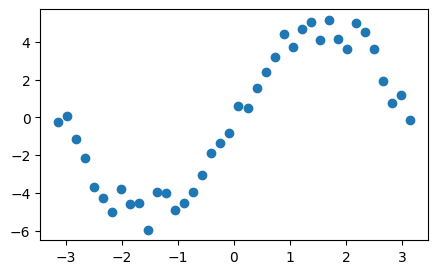

In [ ]:
# Создадим новый набор данных для обучения
x = np.linspace(-np.pi, np.pi, num=40)

rng = np.random.RandomState(RANDOM_STATE)
noise = 2 * rng.uniform(0, 1, x.shape[0]) - 1

y = 5 * np.sin(x)
y += noise

plt.scatter(x, y);

In [ ]:
data = pd.DataFrame({'x': x, 'y': y})
data.head()

,x,y
0,-3.141593,-0.250920
1,-2.980485,0.099372
2,-2.819378,-1.119352


In [ ]:
class RegressionTreePrunning():

    """
    Данный класс содержит простейшую реализацию алгоритма решающего дерева для задачи регрессии.
    """

    def __init__(self, max_depth=3):
        self.max_depth = max_depth  # максимальная глубина дерева
        self.value = np.nan  # значение в поддереве (среднее по всем листьям)
        self.feature_number = -1  # номер лучшего признака
        self.feature_value = np.nan  # значение разделителя
        self.left = None  # левый потомок
        self.right = None  # правый потомок

        self.error = 0  # значение ошибки при обучении


    def __loss_function(self, y_true, y_pred):

        """
        Функция потерь
        """

        return ((y_true - y_pred)**2).sum() # / y_true.shape[0]
        # return (y_true - y_pred).abs().sum()


    def __get_best_split(self, X, y):

        """
        Функция для поиска лучшего сплита (находит признак и значение для разделения).
        """

        col_name = ''
        split_value = np.nan

        base_error = self.__loss_function(y, y.mean())
        # base_error = self.__loss_function(y, y.median())
        best_error = base_error

        N = X.shape[0]

        for col in X.columns:
            values = X[col].sort_values()
            means = [np.mean([values.iloc[i], values.iloc[i+1]]) for i in range(N - 1)]

            for sep in means:
                group1_index = X[X[col] > sep][col].index
                group2_index = X[X[col] <= sep][col].index

                N1, N2 = group1_index.shape[0], group2_index.shape[0]
                if N1 == 0 or N2 == 0:
                    continue
                err1 = self.__loss_function(y[group1_index], y[group1_index].mean())
                err2 = self.__loss_function(y[group2_index], y[group2_index].mean())
                #err1 = self.__loss_function(y[group1_index], y[group1_index].median())
                #err2 = self.__loss_function(y[group2_index], y[group2_index].median())
                error = (N1 * err1 + N2 * err2) / N
                #error = (err1 + err2)

                if error < best_error:
                    col_name = col
                    split_value = sep
                    best_error = error


        return col_name, split_value, best_error


    def fit(self, X, y):

        """
        Метод, отвечающий за обучение дерева. X - матрица "объекты-признаки", y - столбец значений целевой переменной.
        """

        # Инициализируем начальные значения
        self.value = y.mean()
        # self.value = y.median()
        base_error = self.__loss_function(y, self.value)
        error = base_error

        # Если дошли до глубины 1 - выходим
        if self.max_depth == 1:
            return

        dim_shape = X.shape[1]  # количество признаков

        # Значения в левом и правом поддереве
        # left_value = np.nan
        # right_value = np.nan

        col_name, split_value, best_error = self.__get_best_split(X, y)

        if col_name == '': # Если не нашли лучший сплит, выходим
            return

        col_index = X.columns.get_loc(col_name)

        y_left = y[X[col_name] <= split_value]
        y_right = y[X[col_name] > split_value]
        X_left = X[X[col_name] <= split_value]
        X_right = X[X[col_name] > split_value]

        N1, N2 = X_left.shape[0], X_right.shape[0]

        if best_error < error:
            self.feature_number = col_index
            self.feature_value = split_value
            left_value = y_left.mean()
            #left_value = y_left.median()
            right_value = y_right.mean()
            #right_value = y_right.median()
            error = best_error

        else: # Если нет улучшения, выходим
            return

        self.error = error # Запомним ошибку

        # Дошли сюда => есть хорошее разбиение, нужно обучать дальше => инициализируем потомков - те же деревья решений
        self.left = RegressionTreePrunning(self.max_depth - 1)
        self.left.value = left_value
        self.right = RegressionTreePrunning(self.max_depth - 1)
        self.right.value = right_value

        # Обучаем
        self.left.fit(X_left, y_left)
        self.right.fit(X_right, y_right)


    def __predict(self, x):

        '''
         Метод для выполнения предсказания. Смотрим узлы, идем в соответствующих потомков и смотрим в конце self.value - это и будет ответом.
        '''

        if self.feature_number == -1:
            return self.value

        if x[self.feature_number] <= self.feature_value:
            return self.left.__predict(x)
        else:
            return self.right.__predict(x)


    def predict(self, X):

        '''
        Предсказание для матрицы - просто вызов __predict() для каждой строки.
        '''

        y = np.zeros(X.shape[0])

        for i in range(X.shape[0]):
            y[i] = self.__predict(X.iloc[i])

        return y

    def prunning(self, eps=0.1):

        """
        Метод, выполняющий обрезку дерева при обратном обходе.
        """

        # Напишите метод, выполняющий обрезку дерева.
        # ВАЖНО! Обрезка должна осуществляться при обратном обходе дерева, то есть от нижних вершин к корню
        # Если ошибка при каком-то переходе меняется слабо (то есть разность ошибок меньше eps), то необходимо обрезать этого потомка
        # ваш код здесь
        # Base case: if we're at a leaf node, return the node's error
        if self.feature_number == -1:
            return self.error

        # Recursively prune left and right subtrees if they exist
        if self.left:
            left_error = self.left.prunning(eps)
        if self.right:
            right_error = self.right.prunning(eps)

        # Calculate the current node's error
        current_error = self.error

        # If we have both children, check if pruning would improve the error
        if self.left and self.right:
            # Calculate error difference between current node and its children
            children_error = left_error + right_error
            error_diff = abs(current_error - children_error)

            # If error difference is small enough, prune the children
            if error_diff < eps:
                self.left = None
                self.right = None
                self.feature_number = -1

        return current_error


    def display(self):

        """
        Метод, отвечающий за визуализацию дерева
        """

        lines, *_ = self.__display_aux()
        for line in lines:
            print(line)


    def __display_aux(self):

        """
        Метод расчета координат узлов. Возвращает список строк, ширину, высоту и горизонтальную координату узла.
        """

        # У вершины нет потомков
        if self.right is None and self.left is None:
            line = f'{round(self.feature_value, 4)}'
            width = len(line)
            height = 1
            middle = width // 2
            return [line], width, height, middle

        # У вершины только левый потомок
        if self.right is None:
            lines, w, h, mid = self.left.__display_aux()
            s = f'{round(self.feature_value, 4)}'
            s_len = len(s)
            first_line = (mid + 1) * ' ' + (w - mid - 1) * '_' + s
            second_line = mid * ' ' + '/' + (w - mid - 1 + s_len) * ' '
            shifted_lines = [line + s_len * ' ' for line in lines]
            return [first_line, second_line] + shifted_lines, w + s_len, h + 2, w + s_len // 2

        # У вершины только правый потомок
        if self.left is None:
            lines, w, h, mid = self.right.__display_aux()
            s = f'{round(self.feature_value, 4)}'
            s_len = len(s)
            first_line = s + mid * '_' + (w - mid) * ' '
            second_line = (s_len + mid) * ' ' + '\\' + (w - mid - 1) * ' '
            shifted_lines = [s_len * ' ' + line for line in lines]
            return [first_line, second_line] + shifted_lines, w + s_len, h + 2, s_len // 2

        # У вершины есть оба потомка
        left, w_left, h_left, mid_left = self.left.__display_aux()
        right, w_right, h_right, mid_right = self.right.__display_aux()
        s = f'{round(self.feature_value, 4)}'
        s_len = len(s)
        first_line = (mid_left + 1) * ' ' + (w_left - mid_left - 1) * '_' + s + mid_right * '_' + (w_right - mid_right) * ' '
        second_line = mid_left * ' ' + '/' + (w_left - mid_left - 1 + s_len + mid_right) * ' ' + '\\' + (w_right - mid_right - 1) * ' '

        if h_left < h_right:
            left += [w_left * ' '] * (h_right - h_left)
        elif h_right < h_left:
            right += [w_right * ' '] * (h_left - h_right)

        zipped_lines = zip(left, right)
        lines = [first_line, second_line] + [a + s_len * ' ' + b for a, b in zipped_lines]

        return lines, w_left + w_right + s_len, max(h_left, h_right) + 2, w_left + s_len // 2

Для начала создадим дерево глубины 5 и обучим его на имеющемся наборе данных. После чего выполним предсказания на нем же и рассчитаем MSE

In [26]:
# Создайте дерево с max_depth=5 и обучите его на имеющемся наборе данных, выполните предсказания и рассчитайте MSE

prunned_tree = RegressionTreePrunning(max_depth=5)
# ваш код здесь
prunned_tree.fit(data[['x']], data['y'])
tree_pred = prunned_tree.predict(data[['x']])
metrics_report(data['y'], tree_pred)

MSE: 0.21221187209850445
R2: 0.9830514894515942
MAPE: 0.11551012931286886


In [27]:
prunned_tree.display()

                                    ____________________________________-0.0_________________________________                                
                                   /                                                                         \                               
                ________________-2.5777________________                                     ______________2.4166_______________              
               /                                       \                                   /                                   \             
       _____-2.8999______                     ______-0.6444______                  _____0.6444______                   _____2.7388_____      
      /                  \                   /                   \                /                 \                 /                \     
  _-3.061_           _-2.7388_           _-1.6111_           _-0.3222_        _0.3222_          _1.1278_          _2.5777_          _3.061_  
 /    

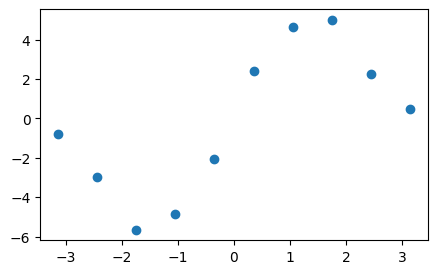

In [28]:
# Создайте тестовый набор данных
x_test = np.linspace(-np.pi, np.pi, num=10)

rng_test = np.random.RandomState(RANDOM_STATE + 1)
noise_test = 2 * rng_test.uniform(0, 1, x_test.shape[0]) - 1

y_test = 5 * np.sin(x_test)
y_test += noise_test

plt.figure(figsize=(5,3))
plt.scatter(x_test, y_test);

In [29]:
test = pd.DataFrame({'x': x_test, 'y': y_test})
test.head()

,x,y
0,-3.141593,-0.769891
1,-2.443461,-2.995805
2,-1.745329,-5.657257
3,-1.047198,-4.848948
4,-0.349066,-2.055823


In [30]:
# Выполните предсказания на test и выведите MSE
# ваш код здесь

test_pred = prunned_tree.predict(test[['x']])
metrics_report(test['y'], test_pred)

MSE: 0.7408928838913453
R2: 0.9417384224351789
MAPE: 0.3936883789847765


In [31]:
# Теперь проведите обрезку дерева с помощью метода prunning() с eps=0.3. Визуализируйте полученное дерево
# ваш код здесь
prunned_tree.prunning(eps=0.3)
prunned_tree.display()

           ____________________________________-0.0___________________________                    
          /                                                                   \                   
    ___-2.5777________________                               ______________2.4166_________        
   /                          \                             /                             \       
-2.8999              ______-0.6444______               __0.6444______                __2.7388__   
                    /                   \             /              \              /          \  
                _-1.6111_           _-0.3222_      0.3222        _1.1278_        2.5777      3.061
               /         \         /         \                  /        \                        
              nan       nan       nan       nan                nan      nan                       


In [24]:
# Выполните предсказания обрезанным деревом на тестовой выборке и выведите MSE. Сравните с MSE полного дерева. Сдайте ответ в форме
# ваш код здесь
prun_pred = prunned_tree.predict(test[['x']])
metrics_report(test['y'], prun_pred)

MSE: 0.641042857473794
R2: 0.9495903267866165
MAPE: 0.2336128496665569


### Задание 3

Это задание посвящено изучению влияния выбора функции потерь (MAE, MSE) на результат обучения дерева. Имеется набор данных. Необходимо обучить два дерева: одно с MSE в качестве функции потерь, а другое - с MAE, затем сравнить результаты

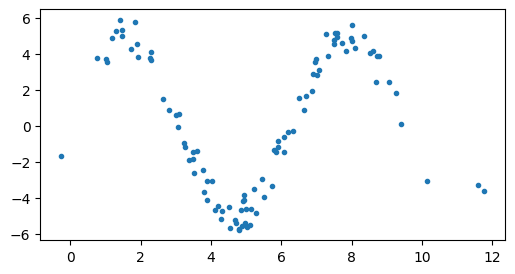

In [33]:
# Создадим набор данных
x_rng = np.random.RandomState(RANDOM_STATE+2)
x = x_rng.poisson(lam=5, size=100).astype('float')
x_noise = 2 * x_rng.uniform(0, 1, x.shape[0]) - 1
x += x_noise

y = 5 * np.sin(x)
y_rng = np.random.RandomState(RANDOM_STATE+3)
y_noise = 2 * y_rng.uniform(0, 1, y.shape[0]) - 1
y += y_noise

plt.figure(figsize=(6,3))
plt.scatter(x, y, marker='.');

In [34]:
data = pd.DataFrame({'x': x, 'y': y})
data.head()

,x,y
0,5.907495,-0.856550
1,7.487436,4.766943
2,7.071460,3.108582
3,6.637129,0.887577
4,2.997531,0.606758


In [36]:
# Разделите данные на тренировочную и тестовую выборки. Размер тестовой выборки - 25%, не забывайте про random_state
# ВАЖНО! X_train и X_test должны быть датафреймами
X_train, X_test, y_train, y_test = train_test_split(data['x'], data['y'], random_state=RANDOM_STATE) # ваш код здесь
X_train

15     7.328150
40     7.516276
96     5.896746
9      4.851961
72     5.437866
        ...    
60     3.499835
71     9.259477
14     1.189336
92    10.144700
51     4.878434
Name: x, Length: 75, dtype: float64

In [ ]:
# Создайте дерево с max_depth=4, обучите его, выполните обрезку, а затем предскажите на тестовой выборке. Выведите RMSE и MAE
mse_tree = # ваш код здесь
# ваш код здесь
mse_tree_pred = # ваш код здесь
# ваш код здесь

In [ ]:
# Визуализируйте полученные предсказания
plt.scatter(X_test, mse_tree_pred, color='r', marker='.')
plt.scatter(X_test, y_test, color='b', marker='.');

Измените класс RegressionTree() на RegressionTreeAbs(): замените функцию потерь на MAE и сделайте другие необходимые изменения

ваш код здесь

In [ ]:
# Создайте дерево RegressionTreeAbs() с max_depth=4, обучите его, выполните обрезку, а затем предскажите на тестовой выборке. Выведите RMSE и MAE
mae_tree = # ваш код здесь
# ваш код здесь
mae_tree_pred = # ваш код здесь
# ваш код здесь

In [ ]:
# Визуализируйте полученные предсказания и сделайте выводы
plt.scatter(X_test, mae_tree_pred, color='r', marker='.')
plt.scatter(X_test, y_test, color='b', marker='.');

In [ ]:
# Теперь изменим наши данные, добавив в них выбросы
ind_rng = np.random.RandomState(RANDOM_STATE+5)
ind_to_outliers = ind_rng.randint(low=0, high=100, size=10)
outliers_noise = ind_rng.randint(low=5, high=10, size=10)

x_rng = np.random.RandomState(RANDOM_STATE+6)
x = x_rng.poisson(lam=5, size=100).astype('float')
x_noise = 2 * x_rng.uniform(0, 1, x.shape[0]) - 1
x += x_noise

y = 5 * np.sin(x)
y_rng = np.random.RandomState(34)
y_noise = 2 * y_rng.uniform(0, 1, y.shape[0]) - 1
y += y_noise

y[ind_to_outliers] += outliers_noise

plt.scatter(x, y, marker='.');

In [ ]:
data = pd.DataFrame({'x': x, 'y': y})
data.head()

In [ ]:
# Снова разделите данные на тренировочную и тестовую выборки, test_size=0.25
X_train, X_test, y_train, y_test = # ваш код здесь

In [ ]:
# Используйте первоначальное дерево с классом RegressionTree
# ваш код здесь

In [ ]:
# Создайте дерево RegressionTree с max_depth=4, обучите его, выполните обрезку, а затем предскажите на тестовой выборке. Выведите RMSE и MAE
mse_tree = # ваш код здесь
# ваш код здесь
mse_tree_pred = # ваш код здесь
# ваш код здесь

In [ ]:
# Визуализируйте полученные предсказания
plt.scatter(X_test, mse_tree_pred, color='r', marker='.')
plt.scatter(X_test, y_test, color='b', marker='.');

In [ ]:
# Создайте дерево egressionTreeAbs() с max_depth=4, обучите его, выполните обрезку, а затем предскажите на тестовой выборке. Выведите RMSE и MAE
mae_tree = # ваш код здесь
# ваш код здесь
mae_tree_pred = # ваш код здесь
# ваш код здесь

In [ ]:
# Визуализируйте полученные предсказания и сделайте выводы
plt.scatter(X_test, mae_tree_pred, color='r', marker='.')
plt.scatter(X_test, y_test, color='b', marker='.');

In [ ]:
# Ответьте на вопросы в форме

### Задание 4

В этом задании мы посмотрим на реакцию дерева при выполнении предсказаний на данных, выходящих за пределы, которые были в обучающей выборке. Последовательно выполните все действия, описанные ниже, затем выберите все правильные ответы

In [ ]:
# Создадим набор данных
x = np.linspace(-np.pi, np.pi, num=100)

rng = np.random.RandomState(RANDOM_STATE)
noise = 2 * rng.uniform(0, 1, x.shape[0]) - 1

y = x + np.sin(x)
y += noise

plt.scatter(x, y);

In [ ]:
# И тестовый набор данных. ВАЖНО! Тестовый набор специально сделан в отличном от тренировочного диапазоне значений
x_test = np.linspace(np.pi, 2*np.pi, num=100)

y_test = x_test + np.sin(x_test)
y_test += noise

plt.scatter(x_test, y_test);

In [ ]:
data = pd.DataFrame({'x': x, 'y': y})
test = pd.DataFrame({'x': x_test, 'y': y_test})

In [ ]:
# Создайте дерево глубины 4 и обучите его на тренировочной выборке, затем выполните предсказания на тестовой и посмотрите на метрики
# ваш код здесь

In [ ]:
# Визуализируйте предсказания и сдайте ответ в форме
plt.scatter(x_test, y_test, color='b', marker='.')
plt.scatter(x_test, tree_pred, color='r', marker='.');

### Задание 5

Это задание призвано показать, как можно улучшить качество деревянных моделей, когда тестовая выборка включает в себя значения из другого диапазона, нежели тренировочная. Выполните задания и выберите все правильные ответы

In [ ]:
# Считайте файл monthly_data.csv и изучите основную информацию о данных
data = # ваш код здесь
# Проверьте и приведите тип данных о времени в нужный формат

In [ ]:
# Визуализируйте данные
plt.plot(data.date, data.sales);

In [ ]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

In [ ]:
# Перед вами данные о продажах по месяцам. Извлеките из даты год и месяц и добавьте их в качестве признаков.
# После этого добавьте в качестве признаков синус и косинус от месяца
data['year'] = # ваш код здесь
data['month'] = # ваш код здесь

data['month_cos'] = # ваш код здесь
data['month_sin'] = # ваш код здесь

In [ ]:
# Теперь добавим еще одну колонку - приросты продаж
data['sales_growth'] = data['sales'] - data['sales'].shift(1)
data = data.loc[1:]

In [ ]:
# Обучим дерево, которое будет предсказывать продажи на основе трех признаков: года и синуса, косинуса от месяца
cols_to_use = ['year', 'month_cos', 'month_sin']
target_col = 'sales'

train, test = data.query("year < 2017"), data.query("year == 2017")
X_train, X_test = train[cols_to_use], test[cols_to_use]
y_train, y_test = train[target_col], test[target_col]

In [ ]:
# Создайте и обучите наше дерево глубины 4. Выведите метрики на тесте
tree_sales = # ваш код для инициализации дерева здесь
# ваш код для обучения дерева здесь
tree_sales_pred = # ваш код для предсказания на тесте здесь
# ваш код для вывода метрик здесь

In [ ]:
# Визуализируйте полученные результаты
plt.plot(train.date, train.sales, color='b', marker='.', label='train')
plt.plot(test.date, test.sales, color='lightgreen', marker='.', label='test truth')
plt.plot(test.date, tree_sales_pred, color='r', marker='.', label='test prediction')

plt.xlabel('date')
plt.ylabel('sales')
plt.legend();

In [ ]:
# Теперь обучим модель, которая будет предсказывать не сами продажи, а их прирост. Возможно, это улучшит качество
cols_to_use = ['year', 'month_cos', 'month_sin']
target_col = 'sales_growth'

train, test = data.query("year < 2017"), data.query("year == 2017")
X_train, X_test = train[cols_to_use], test[cols_to_use]
y_train, y_test = train[target_col], test[target_col]

In [ ]:
# Создайте дерево глубины 4. Обучите его и выполните предсказания
tree_growth = # ваш код здесь
# ваш код здесь
tree_growth_pred = # ваш код здесь

In [ ]:
# С помощью полученных предсказаний рассчитайте сами продажи и выведите метрики
sales_pred = pd.Series(tree_growth_pred).cumsum() + train['sales'].values[-1]
metrics_report(test['sales'], sales_pred)

In [ ]:
# Визуализируйте полученные результаты и сдайте ответ в форму
plt.plot(train.date, train.sales, color='b', marker='.', label='train')
plt.plot(test.date, test.sales, color='lightgreen', marker='.', label='test truth')
plt.plot(test.date, sales_pred, color='r', marker='.', label='test prediction')

plt.xlabel('date')
plt.ylabel('sales')
plt.legend();